<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/szyfry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# przygotowanie katalogu roboczego do pracy :)
import requests
from tqdm import tqdm

def pobierzPlik(url, nazwaPliku):
    req = requests.get(url, stream=True)
    with open(nazwaPliku, 'wb') as uchwytPliku:
        for chunk in tqdm(req.iter_content()):
            uchwytPliku.write(chunk)

nazwyPlikow = ['alice.txt', 'pan_tadeusz.txt']
for nazwa in nazwyPlikow:
  pobierzPlik("https://github.com/rroszczyk/Python/raw/master/Pliki/"+nazwa, nazwa)

31403it [00:01, 23063.40it/s]
110201it [00:05, 19644.54it/s]


In [3]:
def count_words(filename):
    """Obliczenie przybliżonej liczby słów w danym pliku."""
    try:
        with open(filename) as f_obj:
            contents = f_obj.read() 
    except FileNotFoundError:
        pass
    else:
        # Obliczenie przybliżonej liczby słów w danym pliku.
        words = contents.split()
        num_words = len(words)
        print(f"Plik {filename} zawiera {num_words} słów.")

In [4]:
for filename in nazwyPlikow:
    count_words(filename)

Plik alice.txt zawiera 29461 słów.
Plik pan_tadeusz.txt zawiera 69063 słów.


In [5]:
def zlicz_litery(filename):
  with open(filename) as f_obj:
    contents = f_obj.read() 
    txt = contents.upper()

  litery = [chr(chNum) for chNum in list(range(ord('A'), ord('Z') + 1))]
  slownik = {x: 0 for x in litery}

  cnt = 0
  for t in txt:
    if (t in slownik):
      slownik[t] = slownik[t] + 1
      cnt = cnt + 1

  for s in slownik:
    slownik[s] = (slownik[s] / cnt) * 100

  return slownik

Alicja w krainie czarów


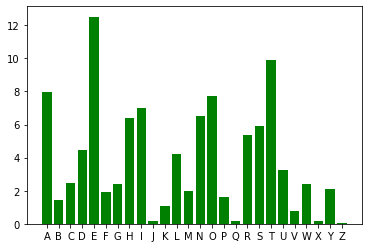

Pan Tadeusz


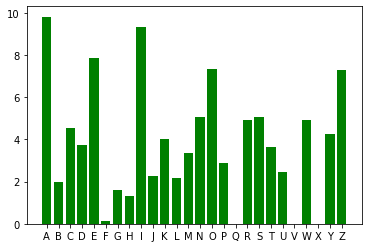

In [6]:
slownik = zlicz_litery("alice.txt")

print("Alicja w krainie czarów")
plt.bar(list(slownik.keys()), slownik.values(), color='g')
plt.show()

slownik = zlicz_litery("pan_tadeusz.txt")

print("Pan Tadeusz")
plt.bar(list(slownik.keys()), slownik.values(), color='g')
plt.show()

In [8]:
## kod Cezara
def encrypt(text, s):
  result = ""
  for i in range(len(text)):
      char = text[i]
      
      if (char.isupper()):
         result += chr((ord(char) + s - 65) % 26 + 65)
      else:
         result += chr((ord(char) + s - 97) % 26 + 97)
  return result

In [9]:
print(f'{17} \t {encrypt("ROSZCZYK", 17)}\n')

for i in range(26):
  print(f'{26 - i} \t {encrypt("IFJQTQPB", i)}')


17 	 IFJQTQPB

26 	 IFJQTQPB
25 	 JGKRURQC
24 	 KHLSVSRD
23 	 LIMTWTSE
22 	 MJNUXUTF
21 	 NKOVYVUG
20 	 OLPWZWVH
19 	 PMQXAXWI
18 	 QNRYBYXJ
17 	 ROSZCZYK
16 	 SPTADAZL
15 	 TQUBEBAM
14 	 URVCFCBN
13 	 VSWDGDCO
12 	 WTXEHEDP
11 	 XUYFIFEQ
10 	 YVZGJGFR
9 	 ZWAHKHGS
8 	 AXBILIHT
7 	 BYCJMJIU
6 	 CZDKNKJV
5 	 DAELOLKW
4 	 EBFMPMLX
3 	 FCGNQNMY
2 	 GDHORONZ
1 	 HEIPSPOA


In [10]:
def columnar(plaintext, key):
  cipher = ''
  size = int(len(plaintext) / key)
  for i in range(key):          
    for j in range(size):  
      idx = (j * key + (i + 1)) - 1
      cipher = cipher + plaintext[idx]
  return(cipher, size)

print(f'{3} \t {columnar("WIADOMOŚĆDOZASZYFROWANIA", 3)}\n')

print(f'{8} \t {columnar("WDODAYONIOŚOSFWIAMĆZZRAA", 8)}\n')



3 	 ('WDODAYONIOŚOSFWIAMĆZZRAA', 8)

8 	 ('WIADOMOŚĆDOZASZYFROWANIA', 3)



In [11]:
!pip install cryptography
from cryptography.fernet import Fernet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.0 MB/s eta 0:00:00


In [12]:
key = Fernet.generate_key()

with open('moj.key', 'wb') as mojklucz:
    mojklucz.write(key)

In [13]:
with open('moj.key', 'rb') as mojklucz:
    key = mojklucz.read()

print(key)

b'd2TCWgVZZTbAr8qIQ6aXPDdTEQW2wmzdFT1t86gGkoE='


In [19]:
f = Fernet(key)

#token = f.encrypt(bytes("Tekst do zakodowania", "utf-8"))
token = f.encrypt(bytes("baaaaaaaaaaaaaaaaaaa", "utf-8"))

print(token)
print("b'gAAAAABjw8-OkaHS9xJwOWmflL91-pYpHoSRYcdE4NEzC4UGFShFMroJilO1mUB4QbKHuT8dcylp9Ip_c-Dg-P6wpQDYbtn094lfiNRQU54ssrnnuXbsRUw=")
  
d = f.decrypt(token)
  
print(d)

b'gAAAAABjw8-tYU9wi6UOP-_Gyn3f6wJgcFEDvDpBjZwohfJMZn4n159R60a3bHZlACZYAClpHnK0Ql_Eo6l9DVEuZcoGem_HogvCNOqce-whQjec-C_fQ04='
b'gAAAAABjw8-OkaHS9xJwOWmflL91-pYpHoSRYcdE4NEzC4UGFShFMroJilO1mUB4QbKHuT8dcylp9Ip_c-Dg-P6wpQDYbtn094lfiNRQU54ssrnnuXbsRUw=
b'baaaaaaaaaaaaaaaaaaa'


In [20]:
import hashlib

str = "tekst do zakodowania"

sha_1 = hashlib.sha1()
sha_1.update(bytes(str, "utf-8"))
print(f"SHA-1: {sha_1.hexdigest()}\n")

md5 = hashlib.md5()
md5.update(bytes(str, "utf-8"))
print(f"MD5: {md5.hexdigest()}\n")

sha384 = hashlib.sha384()
sha384.update(bytes(str, "utf-8"))
print(f"SHA384: {sha384.hexdigest()}\n")

SHA-1: f96213f67419cda0ff01edce20819835bc134af1

MD5: d37b0aba750dfb57e8fb2c5a0fe409b3

SHA384: 309ecf04a58677729325086b9583997d6e5739e6498c68c3d4a3831cdd2c093bfbbf934ab54b8eed10efef65ac5afbbb



In [21]:
!pip install pycryptodome
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Signature.pkcs1_15 import PKCS115_SigScheme
from Crypto.Hash import SHA256
import binascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.9 MB/s eta 0:00:00


In [22]:
keyPair = RSA.generate(1024)

pubKey = keyPair.publickey()
print(f"Public key:  (n={hex(pubKey.n)}, e={hex(pubKey.e)})")
pubKeyPEM = pubKey.exportKey()
print(pubKeyPEM.decode('ascii'))

print(f"Private key: (n={hex(pubKey.n)}, d={hex(keyPair.d)})")
privKeyPEM = keyPair.exportKey()
print(privKeyPEM.decode('ascii'))

Public key:  (n=0xc74f275dd974804276ef7dd33b5bd4338ab66d842aee8738b2ba50e10ca01dc892e1281e254fdff0169c17d2c21c51214862745fd51edd893ebe6dd0fcb71894a2f35097d9dc682e1267eb6527ad6765089bd6b5ab1e9d942dd8e1737bb193463d9f7cc09cacf75d7f76a71700c5007307095aba29cc18069abb471ba7ad7703, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIGfMA0GCSqGSIb3DQEBAQUAA4GNADCBiQKBgQDHTydd2XSAQnbvfdM7W9QzirZt
hCruhziyulDhDKAdyJLhKB4lT9/wFpwX0sIcUSFIYnRf1R7diT6+bdD8txiUovNQ
l9ncaC4SZ+tlJ61nZQib1rWrHp2ULdjhc3uxk0Y9n3zAnKz3XX92pxcAxQBzBwla
uinMGAaau0cbp613AwIDAQAB
-----END PUBLIC KEY-----
Private key: (n=0xc74f275dd974804276ef7dd33b5bd4338ab66d842aee8738b2ba50e10ca01dc892e1281e254fdff0169c17d2c21c51214862745fd51edd893ebe6dd0fcb71894a2f35097d9dc682e1267eb6527ad6765089bd6b5ab1e9d942dd8e1737bb193463d9f7cc09cacf75d7f76a71700c5007307095aba29cc18069abb471ba7ad7703, d=0x79d769b975b642b25f03096898610ad877740e7f3dbf93ea95585119431e9f167eb42652477d0ce938e933a724032b95ad2a82fa12cf4b9f1b3c4ee5f397faedce6fc1de963712d415edc4804ece8c5ec

In [23]:
msg = b'tekst do zakodowania'
encryptor = PKCS1_OAEP.new(pubKey)
encrypted = encryptor.encrypt(msg)
print("Zakodowany:", binascii.hexlify(encrypted))

Zakodowany: b'082f976ee9c10e0726b3ec837bfd93d782325d12e7df28e23e36045f7c3a339d3a3b2563eaa43fa9972ff2dd52fd7ac7d55c09752ecb09461b8a9e54d1a5c67c67688b25768c2b9c596297aa0c551d4091527e2dadfee37cd796715276884462a918927ab5da6cc352196732148c277cde66ec862e171540914fb839db532347'


In [26]:
decryptor = PKCS1_OAEP.new(keyPair)
decrypted = decryptor.decrypt(encrypted)
print('Odkodowany:', decrypted)

Odkodowany: b'tekst do zakodowania'


In [25]:
msg = b'tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
signature = signer.sign(hash)
print("Podpis:", binascii.hexlify(signature))

msg = b'tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
try:
    signer.verify(hash, signature)
    print("Podpis jest poprawny")
except:
    print("Podpis jest błędny")

msg = b'podrobiony tekst do zakodowania'
hash = SHA256.new(msg)
signer = PKCS115_SigScheme(keyPair)
try:
    signer.verify(hash, signature)
    print("Podpis jest poprawny")
except:
    print("Podpis jest błędny")

Podpis: b'9e8926f271ee5d8b5fd2f3f626ca1b7ec7bed330e5b10256b6f2cdd24d6fd2390e2a684cba64699af0a6f620924b88ed9faa1578ea16c57280bc3a62236e83ac726c20aad04fec3ca3b6b8af8569f8a50a2df2d27835622abea47424dfebe69686d020baf892779f5a18ef707f5295e9e34ddf107f143a2705e6cac7d9417677'
Podpis jest poprawny
Podpis jest błędny


In [29]:
import math
 
msg = 19
 
p = 3
q = 7
e = 2
 
n = p * q  ## klucz publiczny n oraz e
 
phi = (p - 1) * (q - 1)  

while (e < phi):
  if (math.gcd(e, phi) == 1):
    break
  else:
    e = e + 1

k = 2
d = int((1 + (k * phi)) / e)  ## klucz prywatny d

print(f"klucz publiczny: {n}, {e}")
print(f"klucz prywanty: {d}")

def encrypt(msg):
    en = math.pow(msg, e)
    c = int(en % n)
    print("Zakodowana wiadomość: ", c)
    return c

def decrypt(me):
  de = math.pow(me, d)
  c = int(de % n)
  print("Odkodowana wiadomość", c)
  return c

print("Wiadomość oryginalna: ", msg)
c = encrypt(msg)
c = decrypt(c)

klucz publiczny: 21, 5
klucz prywanty: 5
Wiadomość oryginalna:  19
Zakodowana wiadomość:  10
Odkodowana wiadomość 19


In [ ]:
: